In [1]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-03-09 16:32:39--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.70.189.149, 52.3.53.111, 34.226.171.201, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.70.189.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  50.3MB/s    in 0.3s    

2020-03-09 16:32:39 (50.3 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
LOG_DIR = './log_Scalar/2'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [4]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://61da282d.ngrok.io


Importar Librerías.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import csv

Especificar Archivos CSV A Leer

In [0]:
Datos = 'EnExcel.csv'
Entrenamiento = 'Entrenamiento.csv'
Validacion = 'Validacion.csv'
WCO = 'WCO.csv'
WCS = 'WCS.csv'

Abrir Archivo De Datos Como csvfile, delimitado por ";". Se asigna la variable YachtData a lo leído en CSV. n es será el número de muestras. Se recorre la matriz reconociendo los datos.



In [3]:
with open(Datos) as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ';')
    YachtData = list(readCSV)
    
    n = len(YachtData)
    for i in range(n):
        temp = YachtData[i]
        for j in range(0, len(temp)):
            temp[j] = float(temp[j])
        YachtData[i] = temp
        
NuMuestras = len(YachtData)        
print(NuMuestras)

308


Normalizar Datos. Se crea la matriz de dimensión 308 (tamaño de muestras) por 7 (número de atributos)



In [0]:
mins = []
maxs = []
normalizedData = np.zeros([308,7],dtype=np.float64)
for i in range(0,7):
    atrib = []
    norm = []

    for j in range(0,len(YachtData)):
        temp = YachtData[j]
        atrib.append(temp[i])
    
    xMin = min(atrib)
    mins.append(xMin)
    xMax = max(atrib)
    maxs.append(xMax)
    yMin = -1
    yMax = 1
    div = (yMax-yMin) / (xMax-xMin)

    for k in range(0,len(YachtData)):
        s = atrib[k]-xMin
        vNor = yMin + s*div
        norm.append(vNor)

    for l in range(0,len(YachtData)):
        normalizedData[l,i] = norm[l]

Variables xtrain y ytrain. 215 datos de entrenamiento. 6 variables de entrada, es decir, entradas de la red. 1 variable de salida, es decir, una neurona de salida. 

In [0]:
xTrain = np.zeros([215,6],dtype=np.float64)
yTrain = np.zeros([215,1],dtype=np.float64)


Importar Datos Entrenamiento, se conocerá el entrenamiento deseado.

In [6]:
with open(Entrenamiento) as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ';')
    traind = list(readCSV)
    
    n = len(traind)
    for i in range(n):
        temp = traind[i]
        for j in range(0, len(temp)):
            temp[j] = float(temp[j])
        traind[i] = temp
        
muestrasTrain = len(traind)        
print(muestrasTrain)

215


Entrenamiento Deseado.

In [7]:
trainDeseado = []
for i in range(len(traind)):
    temp = traind[i]
    trainDeseado.append(temp[6])
print(trainDeseado)

[1.01, 1.43, 2.05, 2.73, 3.87, 7.19, 13.96, 25.18, 41.34, 62.42, 0.03, 0.18, 0.4, 0.73, 1.3, 2.16, 3.35, 5.06, 7.14, 10.36, 15.25, 23.15, 34.62, 51.5, 0.06, 0.15, 0.34, 0.63, 1.13, 1.85, 2.84, 4.34, 6.2, 8.62, 12.49, 20.41, 32.46, 50.94, 0.16, 0.32, 0.59, 0.92, 1.37, 1.94, 2.62, 3.7, 5.45, 9.45, 16.31, 27.34, 41.77, 60.85, 0.09, 0.24, 0.47, 0.78, 1.21, 1.85, 2.62, 3.69, 5.07, 7.95, 13.73, 23.55, 37.14, 55.87, 0.01, 21.51, 33.97, 50.36, 0.12, 0.26, 0.43, 0.69, 1.09, 1.67, 2.46, 3.43, 4.62, 6.86, 11.56, 20.63, 34.5, 54.23, 0.28, 0.44, 0.7, 1.07, 1.57, 2.23, 3.09, 4.09, 5.82, 8.28, 12.8, 20.41, 32.34, 47.29, 0.2, 0.38, 0.64, 0.97, 1.36, 1.98, 2.91, 4.35, 5.79, 8.04, 12.15, 19.18, 30.09, 44.38, 0.15, 0.32, 0.55, 0.86, 1.24, 1.76, 2.49, 3.45, 4.83, 7.37, 12.76, 21.99, 35.64, 53.07, 0.11, 0.24, 0.49, 0.79, 1.28, 1.96, 2.88, 4.14, 5.96, 9.07, 14.93, 24.13, 38.12, 55.44, 0.07, 0.18, 0.4, 0.7, 1.14, 1.83, 2.77, 4.12, 5.41, 7.87, 12.71, 21.02, 34.58, 51.77, 0.08, 0.26, 0.5, 0.83, 1.28, 1.9, 2.68

Normalización de los datos.

In [8]:
normalizedData = np.zeros([215,7],dtype=np.float64)
for i in range(0,7):
    atrib = []
    norm = []

    for j in range(0,len(traind)):
        temp = traind[j]
        atrib.append(temp[i])
    
    xMin = mins[i]
    xMax = maxs[i]
    yMin = -1
    yMax = 1
    div = (yMax-yMin) / (xMax-xMin)

    for k in range(0,len(traind)):
        s = atrib[k]-xMin
        vNor = yMin + s*div
        norm.append(vNor)

    for l in range(0,len(traind)):
        normalizedData[l,i] = norm[l]

print(len(normalizedData))
print(normalizedData[0])

215
[ 0.08       -1.         -1.         -1.         -0.07692308 -0.38461538
 -0.96795385]


0 a 6 Son Datos de Entrada. 6 Son datos de Salida

In [0]:
for i in range(muestrasTrain):
    temp = normalizedData[i]
    xTemp = temp[0:6]
    yTemp = temp[6]
    xTrain[i] = xTemp
    yTrain[i] = yTemp

Definición PlaceHolders, Entradas de la red. 

In [0]:
X = tf.placeholder(tf.float32,(None,None), name='X')
Y = tf.placeholder(tf.float32,(None,None), name='Y')

In [0]:
neurons = 60
Wco = tf.Variable(tf.random_uniform((6,neurons),-1,1))
bco = tf.Variable(tf.random_uniform((neurons,),-1,1))

Wcs = tf.Variable(tf.random_uniform((neurons,1),-1,1))
bcs = tf.Variable(tf.random_uniform((1,),-1,1))

In [0]:
OutputCo= tf.tanh(tf.matmul(X,Wco)+bco)
Output= (tf.matmul(OutputCo,Wcs)+bcs)

In [13]:
loss = tf.reduce_mean(tf.square(Y-Output))
tf.summary.scalar('Loss', loss)

optimizer = tf.train.RMSPropOptimizer(0.05)
#optimizer = tf.train.AdamOptimizer(0.05)
#optimizer = tf.train.MomentumOptimizer(0.05,0.9)
#optimizer = tf.train.MomentumOptimizer(0.05,0.9,use_nesterov=True)
#optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.05,rho=0.95, epsilon=1e-08,use_locking=False)
#optimizer = tf.train.AdagradDAOptimizer(learning_rate, global_step, initial_gradient_squared_accumulator_value=0.05,l1_regularization_strength=0.0,l2_regularization_strength=0.0,use_locking=False)
#optimizer = tf.train.AdagradOptimizer(learning_rate,initial_accumulator_value=0,1,use_locking=False)
#optimizer = tf.train.GradientDescentOptimizer(0.05)

train = optimizer.minimize(loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
init = tf.global_variables_initializer()

sess = tf.Session()
train_writer = tf.summary.FileWriter( "./log_Scalar/2" , sess.graph)
sess.run(init)

merged = tf.summary.merge_all()

for i in range(500):
    sess.run(train, {X: xTrain, Y: yTrain})
    loss_tb, summary_tb = sess.run([loss,merged],{X: xTrain, Y: yTrain})
    train_writer.add_summary(summary_tb, i)
    
    
train_writer.close()

In [15]:
for i in range(50000):
    sess.run(train, {X: xTrain, Y: yTrain})

curr_Wco, curr_bco, curr_Wcs, curr_bcs,curr_loss, curr_Output = sess.run([Wco, bco,Wcs, bcs, loss,Output], {X:  xTrain, Y: yTrain})

#Desnormalización de los datos
curr_DOutput = np.zeros([215,1],dtype=np.float64)
DesOutput = []
atrib = []

for j in range(0,len(traind)):
    temp = traind[j]
    atrib.append(temp[6])
    
xMin = mins[6]
xMax = maxs[6]
for k in range(0,len(traind)):
    n = xMax-xMin
    des = 0.5*(curr_Output[k] + 1)*n+xMin
    DesOutput.append(des)

for l in range(0,len(traind)):
    curr_DOutput[l] = DesOutput[l]
        
#print(xMin)
#print(xMax)

print("Wco: %s bco: %s Wcs: %s bcs: %s loss: %s Output: %s"%(curr_Wco, curr_bco, curr_Wcs, curr_bcs,curr_loss,curr_DOutput))

Wco: [[ 8.15751478e-02  2.50898991e-02 -2.43833680e-02  1.06751330e-01
   6.56132698e-02  8.08066651e-02 -3.60039212e-02 -6.01832457e-02
   4.83317561e-02 -2.27253418e-03 -8.45394582e-02 -6.19177008e-03
  -1.08782001e-01 -5.24569228e-02  9.97398049e-02 -1.54593676e-01
   4.98536751e-02  1.30025353e-02  1.60058901e-01 -7.12399706e-02
  -9.36361830e-05  6.15630150e-02  2.05100589e-02 -9.80814099e-02
   9.02329683e-02  1.06198624e-01 -9.33544785e-02  3.23484726e-02
  -1.18818887e-01 -1.63876954e-02 -4.64532301e-02 -9.46435034e-02
   7.20453262e-02 -4.70147878e-02 -4.76022437e-02 -1.78848252e-01
   4.16560797e-03  2.44407818e-01 -8.05953443e-02 -4.59785387e-02
  -1.27211109e-01  5.29501289e-02  3.49282258e-04 -1.79638322e-02
  -6.44047558e-02 -2.74780989e-02  8.70112479e-02  6.16623908e-02
  -2.30511948e-02 -6.92281574e-02  2.08564326e-02 -5.22265695e-02
   5.11285625e-02 -6.23146556e-02  7.43028745e-02 -5.94429187e-02
   4.88991402e-02  1.08529991e-02 -9.40270647e-02 -1.09968118e-01]
 [ 3

Validación.

In [0]:
xTest = np.zeros([94,6],dtype=np.float64)
yTest = np.zeros([94,1],dtype=np.float64)

In [17]:
with open(Validacion) as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ';')
    trainv = list(readCSV)
    
    n = len(trainv)
    for i in range(n):
        temp = trainv[i]
        for j in range(0, len(temp)):
            temp[j] = float(temp[j])
        trainv[i] = temp
        
muestrasVal = len(trainv)        
print(muestrasVal)

94


In [18]:
valDes = []
for i in range(len(trainv)):
    temp = trainv[i]
    valDes.append(temp[6])
print(valDes)

[0.11, 0.27, 0.47, 0.78, 1.18, 1.82, 2.61, 3.76, 4.99, 7.16, 11.93, 20.11, 32.75, 49.49, 0.04, 0.17, 0.37, 0.66, 1.06, 1.59, 2.33, 3.29, 4.61, 7.11, 11.99, 21.09, 35.01, 51.8, 0.09, 0.29, 0.56, 0.86, 1.31, 1.99, 2.94, 4.21, 5.54, 8.25, 13.08, 21.4, 33.14, 50.14, 0.2, 0.35, 0.65, 0.93, 1.37, 1.97, 2.83, 3.99, 5.19, 8.03, 12.86, 21.51, 33.97, 50.36, 0.2, 0.35, 0.65, 0.93, 1.37, 1.97, 2.83, 3.99, 5.19, 8.03, 12.86, 0.16, 0.39, 0.73, 1.24, 1.96, 3.04, 4.46, 6.31, 8.68, 12.39, 20.14, 31.77, 47.13, 0.04, 0.17, 0.36, 0.64, 1.02, 1.62, 2.63, 4.15, 6.0, 8.47, 12.27, 19.59, 30.48, 46.66]


Normalización de los datos de Validación.

In [19]:
dataNor = np.zeros([94,7],dtype=np.float64)
for i in range(0,7):
    atrib = []
    nor = []

    for j in range(0,len(trainv)):
        temp = trainv[j]
        atrib.append(temp[i])
    
    xMin = mins[i]
    xMax = maxs[i]
    yMin = -1
    yMax = 1
    div = (yMax-yMin) / (xMax-xMin)

    for k in range(0,len(trainv)):
        s = atrib[k]-xMin
        vNor = yMin + s*div
        nor.append(vNor)

    for l in range(0,len(trainv)):
        dataNor[l,i] = nor[l]
print(dataNor)

[[ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-02
  -3.29670330e-02 -1.00000000e+00 -9.96795385e-01]
 [ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-02
  -3.29670330e-02 -8.46153846e-01 -9.91668002e-01]
 [ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-02
  -3.29670330e-02 -6.92307692e-01 -9.85258773e-01]
 [ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-02
  -3.29670330e-02 -5.38461538e-01 -9.75324467e-01]
 [ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-02
  -3.29670330e-02 -3.84615385e-01 -9.62506009e-01]
 [ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-02
  -3.29670330e-02 -2.30769231e-01 -9.41996475e-01]
 [ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-02
  -3.29670330e-02 -7.69230769e-02 -9.16680019e-01]
 [ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-02
  -3.29670330e-02  7.69230769e-02 -8.79826951e-01]
 [ 8.00000000e-02  8.57142857e-02  1.00000000e-01 -7.08661417e-0

In [0]:
for i in range(muestrasVal):
    temp = dataNor[i]
    xTemp = temp[0:6]
    yTemp = temp[6]
    xTest[i] = xTemp
    yTest[i] = yTemp

In [21]:
curr_loss2, curr_Output2 = sess.run([loss,Output], {X:  xTest, Y: yTest})

#Desnormalización de los datos
curr_DOutput2 = np.zeros([94,1],dtype=np.float64)
DesOutput = []
atrib = []

for j in range(0,len(trainv)):
    temp = trainv[j]
    atrib.append(temp[6])
    
xMin = mins[6]
xMax = maxs[6]
for k in range(0,len(trainv)):
    n = xMax-xMin
    des = 0.5*(curr_Output2[k] + 1)*n+xMin
    DesOutput.append(des)

for l in range(0,len(trainv)):
    curr_DOutput2[l] = DesOutput[l]

print("loss: %s "%(curr_loss2))
print(curr_DOutput2)

loss: 0.0019211157 
[[ 0.57649636]
 [ 0.50392061]
 [ 0.47481588]
 [ 0.5454275 ]
 [ 0.8315233 ]
 [ 1.51740694]
 [ 2.73444772]
 [ 4.30184603]
 [ 5.89955044]
 [ 7.87978983]
 [11.95932865]
 [21.33670235]
 [36.99462509]
 [51.88736725]
 [ 0.55001789]
 [ 0.50807577]
 [ 0.5357371 ]
 [ 0.71572202]
 [ 1.20077062]
 [ 2.17061472]
 [ 3.60050225]
 [ 5.10007524]
 [ 6.40091085]
 [ 7.97072697]
 [11.36263752]
 [19.57474136]
 [34.46166992]
 [50.16479492]
 [ 1.08893847]
 [ 1.04100347]
 [ 1.01921582]
 [ 1.06057775]
 [ 1.24644387]
 [ 1.72917485]
 [ 2.69590187]
 [ 4.15111494]
 [ 5.7718792 ]
 [ 7.46072531]
 [10.17337704]
 [16.44926834]
 [29.28444099]
 [45.77370453]
 [ 0.26210308]
 [ 0.22616489]
 [ 0.27455741]
 [ 0.50575823]
 [ 1.08868921]
 [ 2.17979193]
 [ 3.65422535]
 [ 5.06896925]
 [ 6.25885057]
 [ 7.81037998]
 [11.36860371]
 [19.98875809]
 [35.18824768]
 [50.59896851]
 [ 1.00961852]
 [ 0.9393602 ]
 [ 0.88600534]
 [ 0.87551516]
 [ 0.96736383]
 [ 1.28485954]
 [ 2.02845025]
 [ 3.36772776]
 [ 5.25064659]
 [ 7.

In [0]:
dataCO = np.zeros([neurons,7],dtype=np.float64)
dataCS = np.zeros([1,neurons+1],dtype=np.float64)

In [23]:
curr_loss,curr_Output,curr_Wco,curr_bco,curr_Wcs,curr_bcs=sess.run([loss,Output,Wco,bco,Wcs,bcs], {X:  xTrain, Y: yTrain})

print("WCO: %s BCO: %s "%(curr_Wco,curr_bco))

WCO: [[ 8.15751478e-02  2.50898991e-02 -2.43833680e-02  1.06751330e-01
   6.56132698e-02  8.08066651e-02 -3.60039212e-02 -6.01832457e-02
   4.83317561e-02 -2.27253418e-03 -8.45394582e-02 -6.19177008e-03
  -1.08782001e-01 -5.24569228e-02  9.97398049e-02 -1.54593676e-01
   4.98536751e-02  1.30025353e-02  1.60058901e-01 -7.12399706e-02
  -9.36361830e-05  6.15630150e-02  2.05100589e-02 -9.80814099e-02
   9.02329683e-02  1.06198624e-01 -9.33544785e-02  3.23484726e-02
  -1.18818887e-01 -1.63876954e-02 -4.64532301e-02 -9.46435034e-02
   7.20453262e-02 -4.70147878e-02 -4.76022437e-02 -1.78848252e-01
   4.16560797e-03  2.44407818e-01 -8.05953443e-02 -4.59785387e-02
  -1.27211109e-01  5.29501289e-02  3.49282258e-04 -1.79638322e-02
  -6.44047558e-02 -2.74780989e-02  8.70112479e-02  6.16623908e-02
  -2.30511948e-02 -6.92281574e-02  2.08564326e-02 -5.22265695e-02
   5.11285625e-02 -6.23146556e-02  7.43028745e-02 -5.94429187e-02
   4.88991402e-02  1.08529991e-02 -9.40270647e-02 -1.09968118e-01]
 [ 3

In [0]:
with open(WCO, 'w', newline='') as csvfile:
    weightwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    for i in range(0,neurons):
        for j in range(0,6):
            dataCO[i,j] = curr_Wco[j,i]
        
        dataCO[i,6] = curr_bco[i]
        weightwriter.writerow(dataCO[i,:]) 

In [25]:
print("WCS: %s BCS: %s "%(curr_Wcs,curr_bcs)) 

WCS: [[ 2.62833517e-02]
 [-6.44662082e-02]
 [ 1.19901951e-02]
 [ 1.80468503e-02]
 [-1.14818790e-03]
 [-6.28941655e-02]
 [ 1.69794839e-02]
 [-1.33911222e-02]
 [ 3.88839170e-02]
 [ 1.59366019e-02]
 [ 3.60359065e-02]
 [-8.09943490e-03]
 [-1.32328477e-02]
 [-3.33203487e-02]
 [-4.20334109e-04]
 [ 9.96275172e-02]
 [ 4.23764847e-02]
 [ 5.33573842e-03]
 [ 1.11157440e-01]
 [ 3.80599536e-02]
 [-1.00170553e-01]
 [-4.69788164e-02]
 [ 8.97538811e-02]
 [-2.03835815e-02]
 [ 2.93341856e-02]
 [ 4.61228453e-02]
 [ 7.34951869e-02]
 [ 6.15759231e-02]
 [-1.19250715e-01]
 [-4.88060527e-02]
 [-1.05569521e-02]
 [ 7.30545893e-02]
 [ 1.00066895e-02]
 [-5.93920425e-02]
 [-5.79963997e-02]
 [-3.51238139e-02]
 [ 1.32591755e-04]
 [-9.01495814e-02]
 [-1.31751839e-02]
 [-1.60736423e-02]
 [-1.09035829e-02]
 [ 5.16667105e-02]
 [-1.45055410e-02]
 [ 5.28725199e-02]
 [-9.39988017e-01]
 [-1.82920676e-02]
 [-1.82229932e-02]
 [ 4.35623415e-02]
 [-1.80538408e-02]
 [-4.69219573e-02]
 [-2.10774709e-02]
 [-2.96022538e-02]
 [-8.46

In [0]:
with open(WCS, 'w', newline='') as csvfile:
    weightwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    for i in range(0,neurons + 1):
        if i<neurons:
            dataCS[0,i]=curr_Wcs[i,0]
        if i==neurons:
            dataCS[0,i]=curr_bcs[0]
    
    weightwriter.writerow(dataCS[0,:]) 

Coefficients: 
 [[0.99337327]]


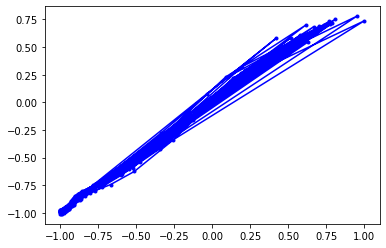

In [27]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

output = curr_Output
target = yTrain

regr = linear_model.LinearRegression()

regr.fit(target,output)

print('Coefficients: \n', regr.coef_)

Xg,Yg = target,output
plt.plot(Xg, Yg,'b.-', label='Regression coeficient')
#plt.title('Coeficiente de regresión de los  datos de entrenamiento')
#plt.legend
plt.show()

Coefficients: 
 [[0.99812343]]


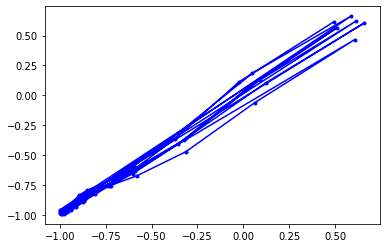

In [28]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

output = curr_Output2
target = yTest

regr = linear_model.LinearRegression()

regr.fit(target,output)

print('Coefficients: \n', regr.coef_)

Xg,Yg = target,output
plt.plot(Xg, Yg,'b.-', label='Regression coeficient')
#plt.title('Coeficiente de regresión de los  datos de validación')
plt.legend
plt.show()

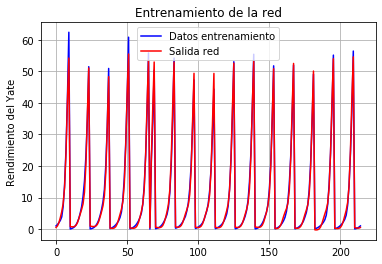

In [29]:
x = list(range(215))
plt.plot(x,trainDeseado,'b', label='Datos entrenamiento')
plt.plot(x,curr_DOutput, 'r', label='Salida red')
plt.legend()
plt.ylabel('Rendimiento del Yate')
plt.title('Entrenamiento de la red')
plt.grid(True)
plt.show()

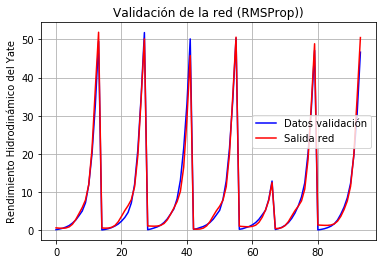

In [31]:
x = list(range(94))
plt.plot(x,valDes,'b', label='Datos validación')
plt.plot(x,curr_DOutput2, 'r', label='Salida red')
plt.legend()
plt.ylabel('Rendimiento Hidrodinámico del Yate')
plt.title('Validación de la red (RMSProp))')
plt.grid(True)
plt.show()